In [1]:
# THis script loads fraoms from girder, loads tracks from girder, 
# crops out a small image centered on the nuclei for 5 frames before and after the crossing.
# It has to deal with bad tracks.

from __future__ import division, print_function
from ipywidgets import interact, interactive, fixed, interact_manual    
import ipywidgets as widgets
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy as sp
from scipy import ndimage
from IPython.core.debugger import set_trace
import cv2
import sys
from pprint import pprint
from random import randint
from nuclei.foci import *
import nuclei.girder as g
import nuclei.girder.time_lapse_data as reader

plt.rcParams['image.cmap'] = 'gist_earth'
matplotlib.rcParams['figure.figsize'] = (11.0, 11.0)




In [9]:

# Hard coded to folder ids
# TODO: Iterate over series in a folder.
# /Gwenda/LawDNADamageFociData
# 5aaf02831fbb9006233ae6a2  073117 BT549_Sv40_Bt549_SV40 NLS GFP 53BP1 mcherry_2017_07_31__18_31_54
#    series000: 5aaf02871fbb9006233ae6a3
#    ...
# 5a95b8361fbb904fdd27d09a  080217 BT549 NLS GFP 53BP1 mcherry_2017_08_02__17_46_03
# 5aaec5d21fbb9006233ad700  080817 BT549 NLS GFP 53BP1 mcherry_2017_08_08__17_27_10

# this function is defined in foci.py
# 073117 BT549_Sv40_Bt549_SV40 NLS GFP 53BP1 mcherry_2017_07_31__18_31_54/series000
# 92 time steps in this series (pattern "time%04d"%idx )
# three shannels are read into a single image (BGR)
# Looks like the brightfield channel is the first (0)
source = reader.time_lapse_data()
# 073117 BT549_Sv40_Bt549_SV40 NLS GFP 53BP1 mcherry_2017_07_31__18_31_54series000
source.load('5aaf02831fbb9006233ae6a2')
num_series = source.get_number_of_series()
series_idx = 0
num_time_steps = source.get_series_length(series_idx)

before_time = 13
after_time = 23
color = (20, 92, 124)

# load the image objects from girder for the two frames (before and after).
before_im, before_item_obj = source.get_image(series_idx, before_time)
after_im, after_item_obj = source.get_image(series_idx, after_time)

# Load the tracks from girder from the two frames.
annotation = g.Annotation("tracks")
annotation.LoadFromItem(before_item_obj['_id'])
before_tracks = annotation.annot_obj['elements']
annotation.LoadFromItem(after_item_obj['_id'])
after_tracks = annotation.annot_obj['elements']

# convert the color to hex format.
hex_digits = "0123456789abcdef"
r1 = hex_digits[int(color[0]/16)]
r2 = hex_digits[color[0]%16]
g1 = hex_digits[int(color[1]/16)]
g2 = hex_digits[color[1]%16]
b1 = hex_digits[int(color[2]/16)]
b2 = hex_digits[color[2]%16]
hex_color = "#"+r1+r2+g1+g2+b1+b2


def find_track_by_color(tracks, hex_color):
    # shortest because mismerged tracks in after will be long
    best_track = None
    for e in tracks:
        if e['type'] == 'polyline' and e['lineColor'] == hex_color:
            if not best_track or len(best_track) < len(e['points']):
                best_track = e['points']
    return best_track

# find the track for this cell in the "before" frame.
before_track = find_track_by_color(before_tracks, hex_color)
after_track = find_track_by_color(after_tracks, hex_color)

print("%d, %d"%(len(before_tracks), len(after_tracks)))



9, 13


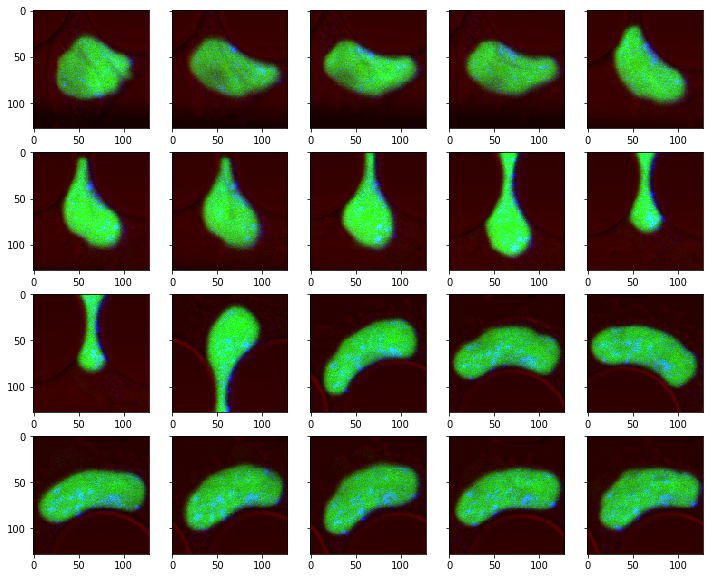

In [19]:
# Get the images for these cells.
# TODO: Put the time value in the z chanell.
# Assume the last track point is from the image time step.

# these will not be in the right order.

images = []


for i in range(10):
    # Assume the last track point is from the image time step.
    pt_idx = len(after_track) - i - 1
    if pt_idx >= 0:
        x,y,z = after_track[pt_idx]
        im, item_obj = source.get_image(series_idx, after_time-i)
        im = im[y-64:y+64, x-64:x+64, ...]
        images.append(im)
        #print((x,y))

for i in range(10):
    # Assume the last track point is from the image time step.
    pt_idx = len(before_track) - i - 1
    if pt_idx >= 0:
        x,y,z = before_track[pt_idx]
        im, item_obj = source.get_image(series_idx, before_time-i)
        im = im[y-64:y+64, x-64:x+64, ...]
        images.append(im)
        #print((x,y))

images.reverse()
        
        
        
fig, ax = plt.subplots(4,5, sharey=True, figsize=(12,10))
ax[0][0].imshow(images[0], aspect="auto")
ax[0][1].imshow(images[1], aspect="auto")
ax[0][2].imshow(images[2], aspect="auto")
ax[0][3].imshow(images[3], aspect="auto")
ax[0][4].imshow(images[4], aspect="auto")
ax[1][0].imshow(images[5], aspect="auto")
ax[1][1].imshow(images[6], aspect="auto")
ax[1][2].imshow(images[7], aspect="auto")
ax[1][3].imshow(images[8], aspect="auto")
ax[1][4].imshow(images[9], aspect="auto")
ax[2][0].imshow(images[10], aspect="auto")
ax[2][1].imshow(images[11], aspect="auto")
ax[2][2].imshow(images[12], aspect="auto")
ax[2][3].imshow(images[13], aspect="auto")
ax[2][4].imshow(images[14], aspect="auto")
ax[3][0].imshow(images[15], aspect="auto")
ax[3][1].imshow(images[16], aspect="auto")
ax[3][2].imshow(images[17], aspect="auto")
ax[3][3].imshow(images[18], aspect="auto")
ax[3][4].imshow(images[19], aspect="auto")

